In [1]:
import os
os.getcwd()

'E:\\Graph_molecule_project\\notebooks'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
SEED = 42
np.random.seed(SEED)
state = SEED

In [4]:
data_path = "../sample_datasets/HIV.csv"

In [5]:
data = pd.read_csv(data_path)
data.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB


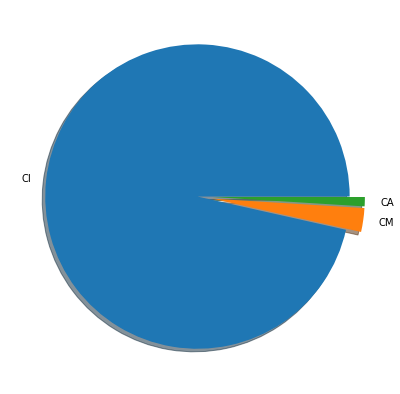

In [7]:
activities = data["activity"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(activities.values, labels=activities.index,
        explode = [0.1 if index > 0 else 0 for index in range(len(activities))], shadow=True)
plt.show()

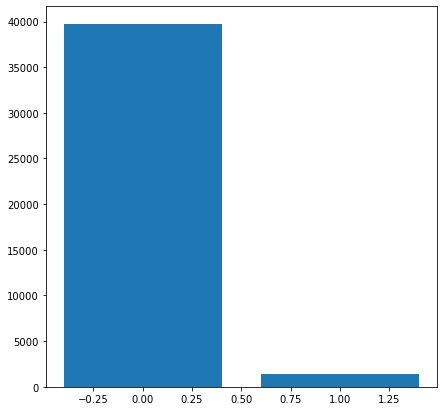

In [8]:
targets = data["HIV_active"].value_counts()
plt.figure(figsize=(7,7))
plt.bar(targets.index, targets.values)
plt.show()

In [9]:
print(f"Negative target abundance : {targets.values[0] / sum(targets.values)}")
print(f"Positive target abundance : {targets.values[1] / sum(targets.values)}")

Negative target abundance : 0.9649135604347508
Positive target abundance : 0.03508643956524911


In [10]:
# Dropping the 0-values targets to a huge number so that, the data can be approximately get uniformity.
# The expected binary-target ratio would be 70-30

pos_targets_records = data[data["HIV_active"] == 1]
neg_targets_records = data[data["HIV_active"] == 0]
required_neg_target_records = int(len(pos_targets_records) * (7/3))

final_data = pd.concat([pos_targets_records,
                        neg_targets_records.sample(n=required_neg_target_records,
                                                   random_state=state)])
final_data.head()

,smiles,activity,HIV_active
11,O=C(O)Cc1ccc(SSc2ccc(CC(=O)O)cc2)cc1,CM,1
16,NNP(=S)(NN)c1ccccc1,CM,1
80,O=Nc1ccc(O)c(N=O)c1O,CM,1
203,Oc1ccc(Cl)cc1C(c1cc(Cl)ccc1O)C(Cl)(Cl)Cl,CM,1
234,NNC(=O)c1ccccc1SSc1ccccc1C(=O)NN,CM,1


In [11]:
final_targets = final_data["HIV_active"].value_counts()
print(f"Negative target abundance : {final_targets.values[0] / sum(final_targets.values)}")
print(f"Positive target abundance : {final_targets.values[1] / sum(final_targets.values)}")

Negative target abundance : 0.7
Positive target abundance : 0.3


In [12]:
X = final_data["smiles"]
y = final_data["HIV_active"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train-Test Split was taken for model validation
# Ratio taken 85-15 as the training dataset is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=state, stratify=y)

In [15]:
# Packing Training and testing dataset into cvs files
pd.concat([X_train,y_train], axis=1).reset_index(drop=True).to_csv("../data/raw/train.csv", index=False)
pd.concat([X_test,y_test], axis=1).reset_index(drop=True).to_csv("../data/raw/test.csv", index=False)